# K-means clustering
_María Camila Vásquez Correa_

### Necessary packages

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist
%matplotlib inline

## Data loading
We will load the data, the higher dimensional data and the embbeding

In [23]:
n = 150  # Number of samples
N = 4    # Number of features
X = load_iris().data.T
# Normalization
for i in range(N):
    X[i] = X[i]/np.max(X[i])
X = X.T
Y = pd.read_csv('iris_embbeding.csv').values
X1 = pd.read_csv('high_dimension_iris.csv').values

### Parameters

In [25]:
k = 3
epsilon = 0.005
n_iter = 1000
metric = 'euclidean'

In [27]:
def cost_function(clusters, data):
    A = data.reshape((*data.shape,1))
    B = clusters.reshape((1,*clusters.shape))
    J = cdist(clusters, data, metric = metric) 
    J = np.sum(np.min(J, axis=-1))
    return J

In [30]:
# Compute the matrix U
def compute_U(clusters, data):
    U = cdist(clusters, data, metric = metric).T 
    U = np.argmin(U, axis=-1)    
    return U

In [31]:
def update_cluster(U, data):
    c = np.arange(k).reshape(k,1)
    mask = U == c
    mask = np.expand_dims(mask,axis = -1)
    A = np.expand_dims(data, axis = 0)
    mask = np.where(mask, A, np.nan)
    new_cluster = np.nanmean(mask, axis = 1)
    return new_cluster

In [28]:
# Initialize the centers
c_random = np.random.randint(0,n,k)
clusters = X[c_random]
cluster_index = c_random

In [32]:
# Ciclo principal
J = np.inf
i = 0
while (J > epsilon) & (i < n_iter):
    # computar la matrix U
    U = compute_U(clusters, X)
    # computar el costo
    J = cost_function(clusters, X)
    # actualizar los clusters
    clusters = update_cluster(U = U, data = X)
    i += 1

In [33]:
clusters

array([[0.63367089, 0.77909091, 0.21188406, 0.0984    ],
       [0.7591371 , 0.62900128, 0.65625638, 0.58478873],
       [0.87472719, 0.71081505, 0.84507746, 0.88      ]])

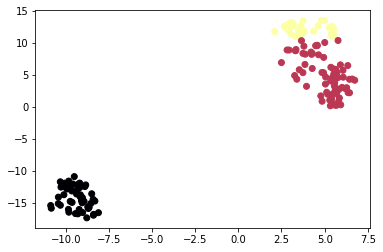

In [36]:
plt.scatter(Y[:, 0], Y[:, 1], c=U, cmap = 'inferno')
plt.show()